# SHscore validation on simulated data

## SHscore statistics
Here you find the code you need to compute the statistics on SHscores computed on simulated datasets. 
SHscores have been precomputed because the computation, here, would take too much time. 

You may refer to the other notebooks in the current repository or to the documentation at the official [PhyliCS repository](https://github.com/bioinformatics-polito/PhyliCS) to learn how to compute the SHscore.


### Experiment1: spatial segregation and intermixing

In [1]:
import os
import pandas as pd 
from math import nan 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import mannwhitneyu

SPATIAL_DIR = "data/simulations/spatial"

samples=os.listdir(SPATIAL_DIR)

# collect spatial simulation scores (already computed)
sh_scores = pd.DataFrame(columns=["Het", "Hom"]) 
for sample in samples:
    sample_path = os.path.join(SPATIAL_DIR, sample)
    if os.path.isdir(sample_path):
        het_score = nan 
        hom_score = nan
        f = os.path.join(sample_path, "hom", "heterogeneity_scores.csv")
        hom_score = pd.read_csv(f, sep = "\t").iloc[0]["het_score"].astype(float)
        f = os.path.join(sample_path, "het", "heterogeneity_scores.csv")
        het_score = pd.read_csv(f, sep = "\t").iloc[0]["het_score"].astype(float)
        sh_scores = sh_scores.append({"Het":het_score, "Hom":hom_score}, ignore_index=True)
 
sh_scores.head()


,Het,Hom
0,-0.010599,0.152150
1,-0.004221,0.122702
2,-0.020251,0.101908
3,-0.014684,0.220385
4,-0.007606,0.209253


In [2]:
stat, p1 =  mannwhitneyu(sh_scores['Het'].dropna(), sh_scores['Hom'].dropna())
print("Mann-whitney-u: " + str(p1))

Mann-whitney-u: 3.533035965194466e-18


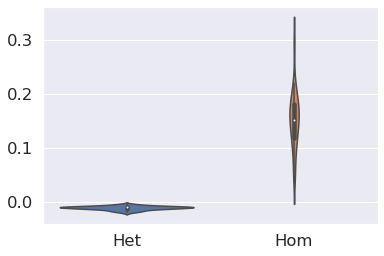

In [3]:
sns.set(font_scale=1.5)
sns.violinplot(data=sh_scores)
plt.savefig(os.path.join(SPATIAL_DIR, "aggregate_het_scores_violin_spatial.png"))

In [4]:
sh_scores.describe()

,Het,Hom
count,50.000000,50.000000
mean,-0.011163,0.152459
std,0.003506,0.051984
min,-0.020251,0.043447
25%,-0.013067,0.117336
50%,-0.010597,0.151503
75%,-0.009084,0.181446
max,-0.004221,0.294926


In [5]:
third_quart = sh_scores.quantile(0.75)
first_quart = sh_scores.quantile(0.25)
IQR = third_quart - first_quart
print("IQR")
IQR

IQR


Het    0.003983
Hom    0.064110
dtype: float64

### Experiment2: early and late metastasis spreading

In [6]:
MET_DIR = "data/simulations/metastasis"
EXPS = ["MetEarly", "MetLate"]

#samples=os.listdir(MET_DIR)

# collect metastasis simulation scores (already computed)
sh_scores = pd.DataFrame() 
for exp in EXPS:
    col = []
    prefix = os.path.join(MET_DIR, exp)
    for sample in samples:
        sample_path = os.path.join(prefix, sample)
        if os.path.isdir(sample_path):
            f = os.path.join(sample_path, "heterogeneity_scores.csv")
            sh_score = pd.read_csv(f, sep = "\t")["het_score"].astype(float).values[0]
            col.append(sh_score)
    sh_scores[exp] = col
 
sh_scores.head()

,MetEarly,MetLate
0,0.246488,0.248649
1,0.214796,0.285811
2,0.219802,0.283999
3,0.279430,0.373420
4,0.384243,0.275313


In [7]:
stat, p1 =  mannwhitneyu(sh_scores['MetEarly'].dropna(), sh_scores['MetLate'].dropna())
print("Mann-whitney-u: " + str(p1))

Mann-whitney-u: 0.002942859612686273


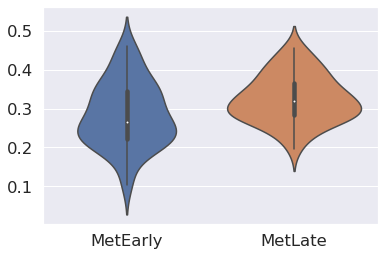

In [8]:
sns.set(font_scale=1.5)
sns.violinplot(data=sh_scores)
plt.savefig(os.path.join(SPATIAL_DIR, "aggregate_het_scores_violin_met.png"))

In [9]:
sh_scores.describe()

,MetEarly,MetLate
count,50.000000,50.000000
mean,0.284679,0.325422
std,0.082631,0.060854
min,0.103382,0.195173
25%,0.221824,0.282963
50%,0.266158,0.319743
75%,0.345860,0.366470
max,0.460590,0.456582


In [10]:
third_quart = sh_scores.quantile(0.75)
first_quart = sh_scores.quantile(0.25)
IQR = third_quart - first_quart
print("IQR")
IQR

IQR


MetEarly    0.124036
MetLate     0.083507
dtype: float64